In [2]:
import cv2
import numpy as np
import os
import pytesseract
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
def plot_images(img1,img2,title1="",title2=""):
    fig=plt.figure(figsize=[15,15])
    ax1=fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[],yticks=[],title=title1)
    
    ax2=fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[],yticks=[],title=title2)
    

In [8]:
path = "./images/car1.jpg"

In [9]:
image = cv2.imread(path)

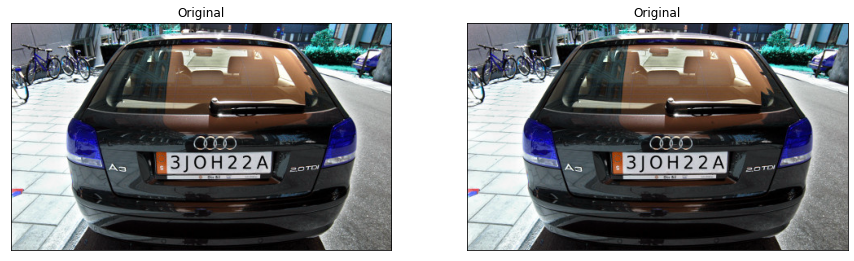

In [11]:
plot_images(image,image,title1="Original",title2="Original")

In [12]:
gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

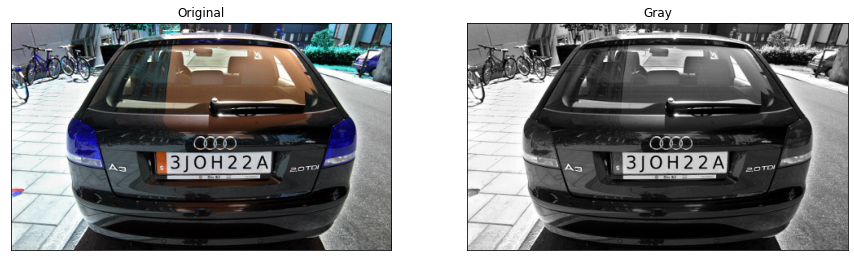

In [13]:
plot_images(image,gray,title1="Original",title2="Gray")

In [14]:
blur= cv2.bilateralFilter(gray, 11, 90,90)

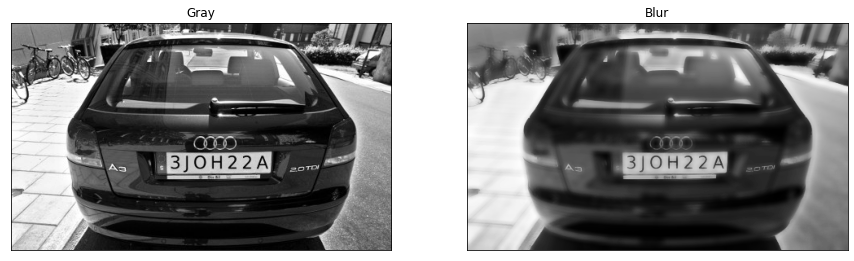

In [16]:
plot_images(gray,blur,title1="Gray",title2="Blur")

In [17]:
edges=cv2.Canny(blur,30,200)

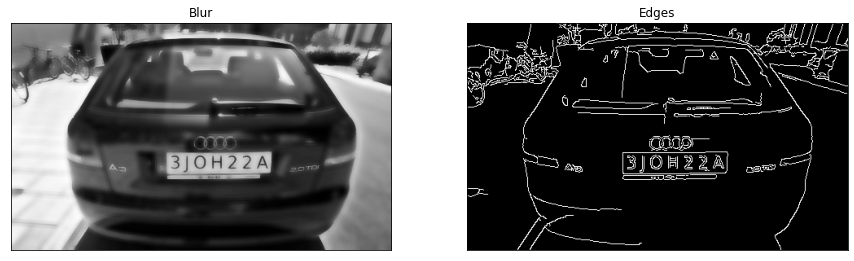

In [18]:
plot_images(blur,edges,title1="Blur",title2="Edges")